In [1]:
!pip install "gymnasium[mujoco]"
!pip install mpi4py


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import subprocess
import torch
from matplotlib import pyplot as plt
import gymnasium as gym
import numpy as np
import pandas as pd

In [3]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_file, download_everything

trajectory = download_everything('ppo, TBP, zs_ppo, ppo_models, zs_ppo_models')

from Zero_Sum_PPO import ZS_PPO
from utils.run_utils import setup_logger_kwargs
from PPO import PPO
import TBP
from TBP import ThreeBodyEnv

model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
PPO.py already exists.
Directory 'model' already exists and is not empty.
model/actor_cpu.pth already exists.
model/v_cpu.pth already exists.
Zero_Sum_PPO.py already exists.
Directory 'model_zs' already exists and is not empty.
model_zs/actor_cpu.pth already exists.
model_zs/actor_1_cpu.pth already exists.
model_zs/v_cpu.pth already exists.
model_zs/v_1_cpu.pth already exists.
Directory 'utils' already exists.
Directory 'utils' already exists.
trajectory.csv already exists.


In [4]:
# Common hyperparameters and settings
hid = 32
l = 2
seed = 0
epochs = 50
exp_name = 'ppo'
steps_per_epoch = 30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid] * l)
logger_kwargs = setup_logger_kwargs(exp_name, seed)


In [5]:
# Helper function to create the environment
def make_env(error_range=0.01, final_range=0.001):
    return ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/PPO/time_delay/data/PPO_3BP/PPO_3BP_s0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "clip_ratio":	0.2,
    "env":	{
        "<ThreeBodyEnv instance>":	{
            "action_space":	{
                "Box(-4.0, 4.0, (2,), float32)":	{
                    "_np_random":	null,
                    "_shape":	[
                        2
                    ],
                    "bounded_above":	"[ True  True]",
                    "bounded_below":	"[ True  True]",
                    "dtype":	"float32",
                    "high":	"[4. 4.]",
                    "high_repr":	"4.0",
                    "low":	"[-4. -4.]",
                    "low_repr":	"-4.0"
                }
            },
            "dt":	0.001,
            "error_range":	0.01,
            "final_range":	0.001,
            "max_steps":	6000,
            "m

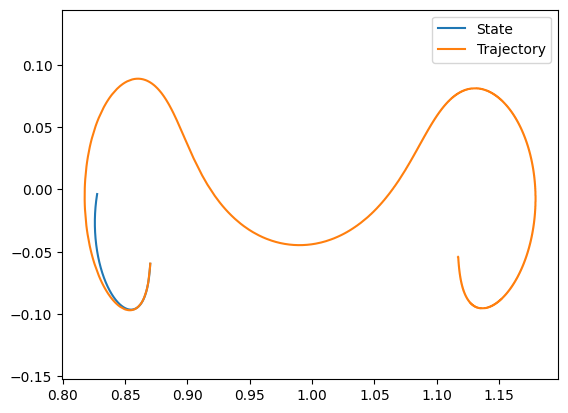

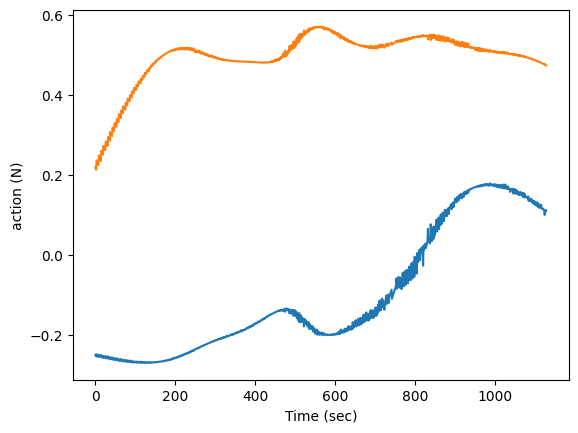

Model loaded successfully and device is cpu! 🥰😎
done 🥺
second player was in the game
(9999, 6)


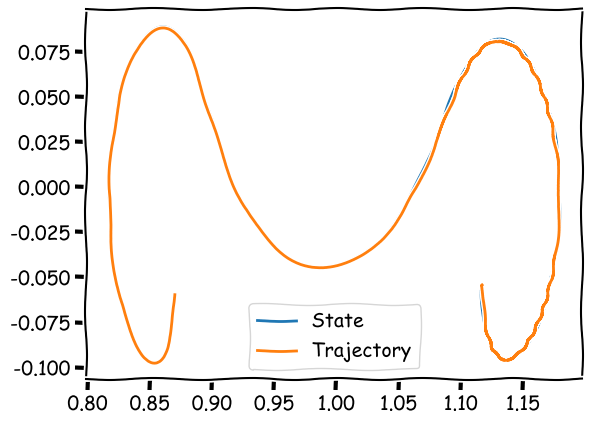

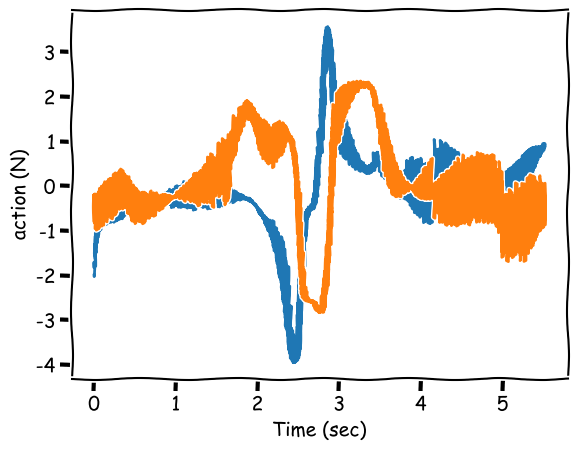

In [6]:
# Define constants
HID = 32
L = 2
GAMMA = 0.99
SEED = 0
STEPS = 30000
EPOCHS = 100
EXP_NAME = 'PPO_3BP'
ac_kwargs = dict(hidden_sizes=[HID] * L)
# Use the constants directly


logger_kwargs = setup_logger_kwargs(EXP_NAME, SEED)

zs_ppo = ZS_PPO(ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), ac_kwargs=ac_kwargs, gamma=GAMMA,
            seed=SEED, steps_per_epoch=STEPS, logger_kwargs=logger_kwargs, epochs=EPOCHS)
# test PPO agent (not trained)
zs_ppo.test(deterministic=True)

zs_ppo.load(filepath='model_zs/')
zs_ppo.test(fun_mode=True)
zs_ppo.env.second_player = False

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/PPO/time_delay/data/PPO_3BP/PPO_3BP_s0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "clip_ratio":	0.2,
    "env":	{
        "<ThreeBodyEnv instance>":	{
            "action_space":	{
                "Box(-4.0, 4.0, (2,), float32)":	{
                    "_np_random":	null,
                    "_shape":	[
                        2
                    ],
                    "bounded_above":	"[ True  True]",
                    "bounded_below":	"[ True  True]",
                    "dtype":	"float32",
                    "high":	"[4. 4.]",
                    "high_repr":	"4.0",
                    "low":	"[-4. -4.]",
                    "low_repr":	"-4.0"
                }
            },
            "dt":	0.001,
            "error_range":	0.01,
            "final_range":	0.001,
            "max_steps":	6000,
            "m

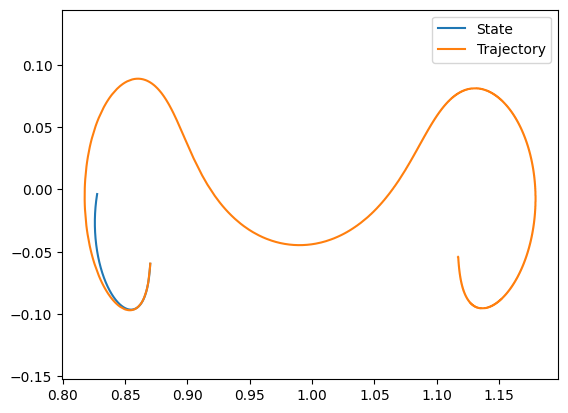

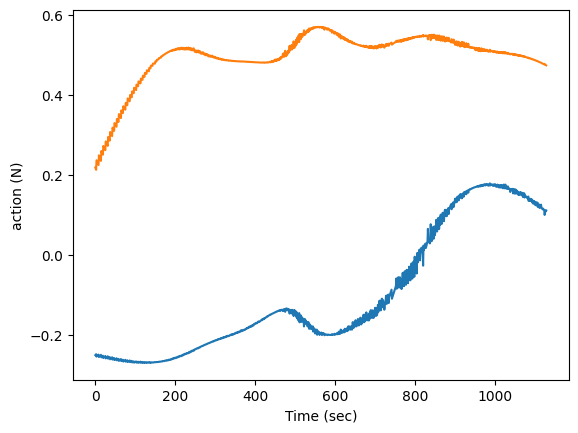

Model loaded successfully and device is cpu! 🥰😎
done 🥺
second player was in the game
(9999, 6)


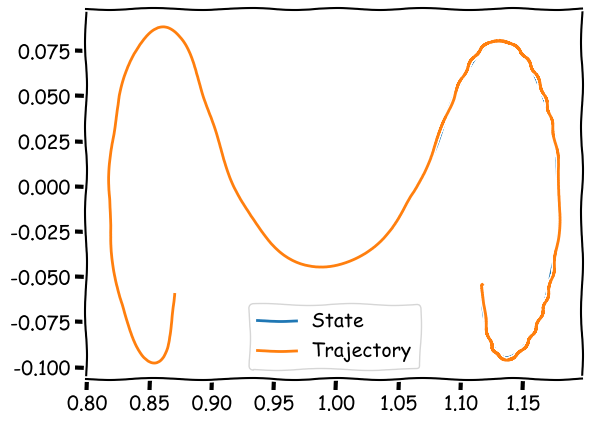

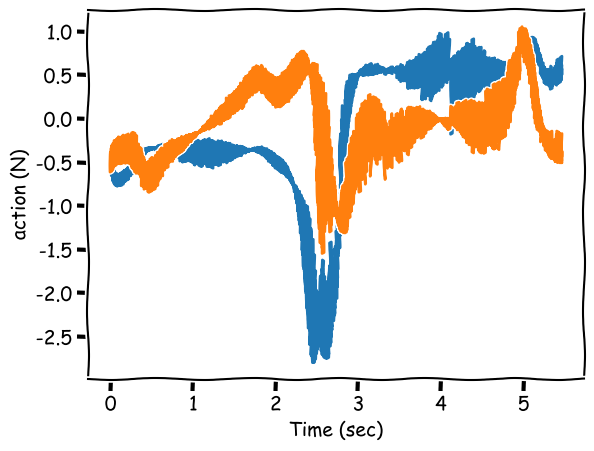

In [7]:
from PPO import PPO

# Define constants
HID = 32
L = 2
GAMMA = 0.99
SEED = 0
STEPS = 30000
EPOCHS = 100
EXP_NAME = 'PPO_3BP'
ac_kwargs = dict(hidden_sizes=[HID] * L)
# Use the constants directly


logger_kwargs = setup_logger_kwargs(EXP_NAME, SEED)

ppo = PPO(ThreeBodyEnv(trajectory, error_range=0.01, final_range=0.001), ac_kwargs=ac_kwargs, gamma=GAMMA,
            seed=SEED, steps_per_epoch=STEPS, logger_kwargs=logger_kwargs)
# test PPO agent (not trained)
ppo.test(deterministic=True)

ppo.load()
ppo.test(fun_mode=True)
ppo.env.second_player = False

In [8]:
class ActionLatencyWithNoiseWrapper(gym.Wrapper):
    """
    Gym environment wrapper that adds both action latency and actuator noise.
    This wrapper supports the Gymnasium API where:
      - reset returns: (observation, info)
      - step returns: (observation, reward, terminated, truncated, info)
    """

    def __init__(self, env, delay_steps=3, disturbance_std=0.05):
        super(ActionLatencyWithNoiseWrapper, self).__init__(env)
        self.delay_steps = delay_steps  # Number of steps to delay actions
        self.disturbance_std = disturbance_std  # Standard deviation of noise added to actions
        self.last_action = None
        self.action_buffer = []

    def reset(self, **kwargs):
        result = self.env.reset(**kwargs)
        if isinstance(result, tuple):
            obs, info = result
            return obs, info
        else:
            return result

    def step(self, action):
        """
        Adds both latency (delayed actions) and actuator noise to the action.
        """
        if len(self.action_buffer) < self.delay_steps:
            # Buffer the action until it is executed after the delay
            self.action_buffer.append(action)
            return self.env.step(self.last_action if self.last_action is not None else action)
        else:
            # Execute the delayed action
            self.last_action = self.action_buffer.pop(0)
            self.action_buffer.append(action)
            action_with_noise = self._apply_noise(self.last_action)
            obs, reward, terminated, truncated, info = self.env.step(action_with_noise)
            return obs, reward, terminated, truncated, info

    def _apply_noise(self, action):
        """
        Adds Gaussian noise to the action to simulate actuator noise.
        """
        action = np.array(action)
        noise = np.random.normal(0, self.disturbance_std, size=action.shape)
        return np.clip(action + noise, self.env.action_space.low, self.env.action_space.high)


def make_env_latency_with_noise(error_range=0.01, final_range=0.001, delay_steps=3, disturbance_std=0.05):
    """
    Creates the ThreeBodyEnv wrapped with both action latency and actuator noise.
    """
    env = ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)
    return ActionLatencyWithNoiseWrapper(env, delay_steps=delay_steps, disturbance_std=disturbance_std)


In [9]:
def run_episode(agent, env_fn, max_steps=10000):
    """
    Run one episode using the given agent and environment function.
    Adapted for Gymnasium (reset returns (obs, info) and step returns five outputs).

    Returns:
        total_reward, avg_error_per_step, num_of_fails, avg_action_magnitude_per_step
    """
    env = env_fn()

    obs, _ = env.reset()
    total_reward = 0.0
    total_error = 0.0
    num_of_fails = 0
    total_actions = 0.0
    steps = 0
    done = False
    env.second_player = False

    while not done and steps < max_steps:
        action, _, _ = agent.ac.step(torch.as_tensor(obs, dtype=torch.float32), deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward
        steps += 1
        # match other notebooks’ metrics
        total_error = np.dot(obs[0:2], obs[0:2])**0.5
        total_actions += np.dot(action, action)**0.5
        if done and reward < 0:
            num_of_fails += 1

    env.close()
    return total_reward, total_error/steps, num_of_fails, total_actions/steps


def evaluate_agent(agent, env_fn, num_episodes=20, max_steps=10000):
    """
    Evaluate the agent over multiple episodes and collect cumulative rewards, errors, fails, and actions.
    """
    returns = []
    errors = []
    fails = []
    actions = []
    for i in range(num_episodes):
        ret, error, fail, action = run_episode(agent, env_fn, max_steps)
        returns.append(ret)
        errors.append(error)
        fails.append(fail)
        actions.append(action)
        print(f"{i} of {num_episodes}")
    return returns, errors, fails, actions


[-0.00960537 -0.00285886 -0.02197552  0.00097476]
idx 0.07082 state 0.024172501505479
too much error 🥲😱
second player was in the game
0 of 10
[-0.00997122  0.00088908 -0.01286033  0.0033338 ]
idx 0.0765 state 0.016634844188788512
too much error 🥲😱
second player was in the game
1 of 10
[-0.00972411 -0.00235494 -0.02154844  0.0012602 ]
idx 0.07082 state 0.02379133140154267
too much error 🥲😱
second player was in the game
2 of 10
[-0.00995911 -0.00093264 -0.01757415  0.00237266]
idx 0.07284 state 0.020360106467294845
too much error 🥲😱
second player was in the game
3 of 10
[-0.0098583  -0.00169124 -0.01958868  0.0020051 ]
idx 0.07173 state 0.022085812308287208
too much error 🥲😱
second player was in the game
4 of 10
[-0.0098749  -0.00163155 -0.01845281  0.00215177]
idx 0.07284 state 0.021102412373453137
too much error 🥲😱
second player was in the game
5 of 10
[-0.00981362 -0.00200668 -0.01980891  0.00181126]
idx 0.07191 state 0.022271228247000986
too much error 🥲😱
second player was in the gam

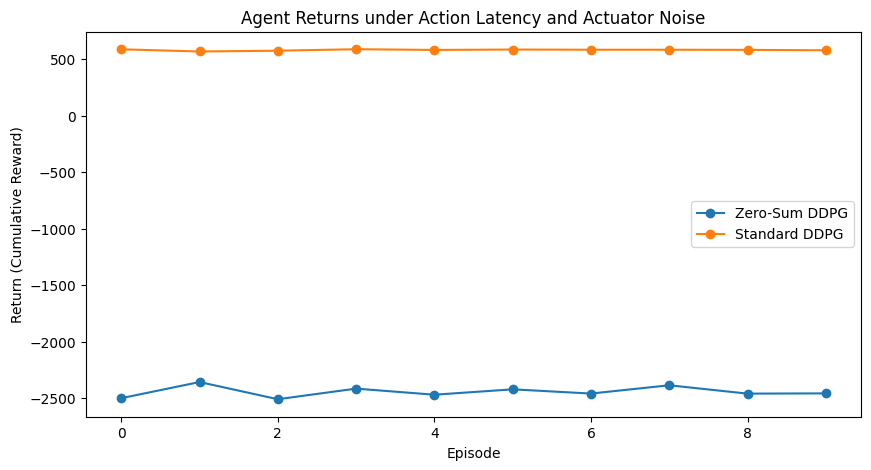

Zero-Sum DDPG with Action Latency and Actuator Noise Average Error: 0.0024856832096471484
Standard DDPG with Action Latency and Actuator Noise Average Error: 2.9946113957049832e-05


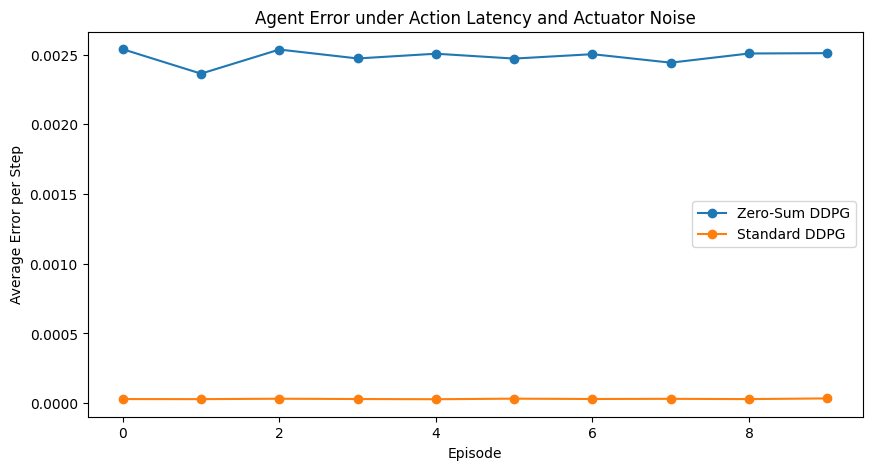

Zero-Sum DDPG with Action Latency and Actuator Noise Average Action Magnitude: 2.560526089755929
Standard DDPG with Action Latency and Actuator Noise Average Action Magnitude: 0.7889890404056248


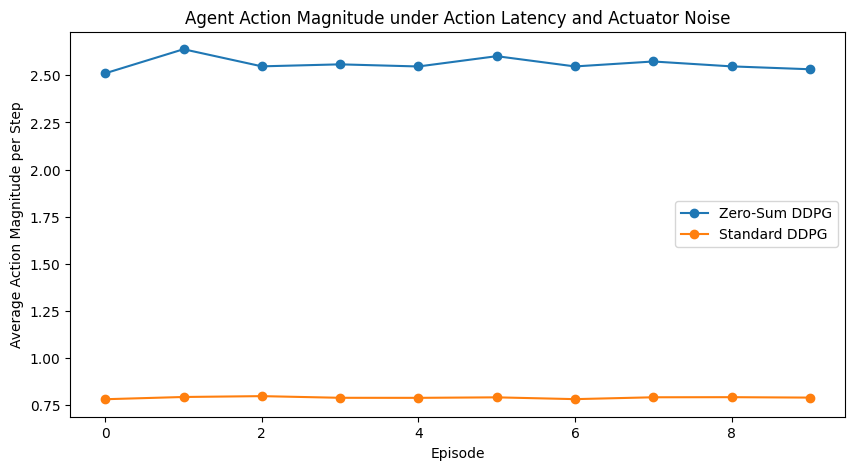

Zero-Sum DDPG with Action Latency and Actuator Noise Average Number of Fails per Episode: 1.0
Standard DDPG with Action Latency and Actuator Noise Average Number of Fails per Episode: 0.0


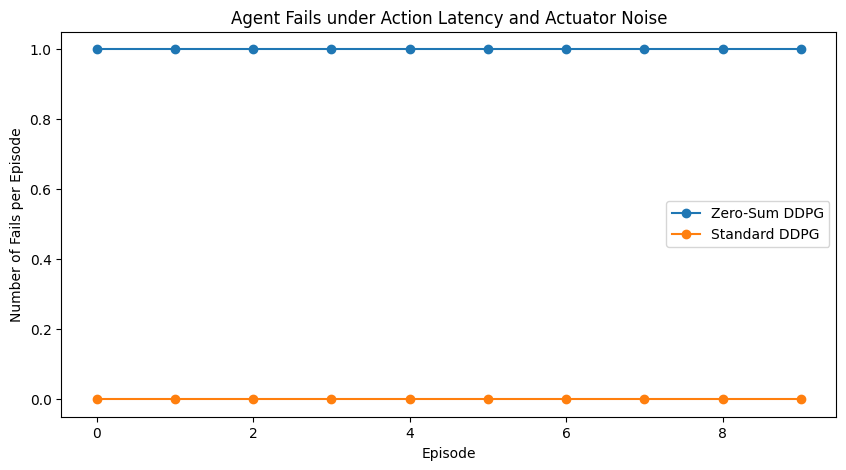

Normalized Zero-Sum DDPG with Action Latency and Actuator Noise Average Return: -2.4417521752139564
Normalized Standard DDPG with Action Latency and Actuator Noise Average Return: 0.5803897941002399
Normalized Zero-Sum DDPG with Action Latency and Actuator Noise Average Error: 2.4856832096471484
Normalized Standard DDPG with Action Latency and Actuator Noise Average Error: 0.02994611395704983
Normalized Zero-Sum DDPG with Action Latency and Actuator Noise Average Action Magnitude: 2.560526089755929
Normalized Standard DDPG with Action Latency and Actuator Noise Average Action Magnitude: 0.7889890404056248
Normalized Zero-Sum DDPG with Action Latency and Actuator Noise Average Number of Fails per Episode: 0.1
Normalized Standard DDPG with Action Latency and Actuator Noise Average Number of Fails per Episode: 0.0
[[-2498.1299440238745, -2355.466775128339, -2507.4206377506134, -2413.728711594357, -2467.5528513603904, -2420.0518267488305, -2457.275056063, -2384.1791606689185, -2457.9065077

/var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T/ipykernel_19387/1998529104.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])


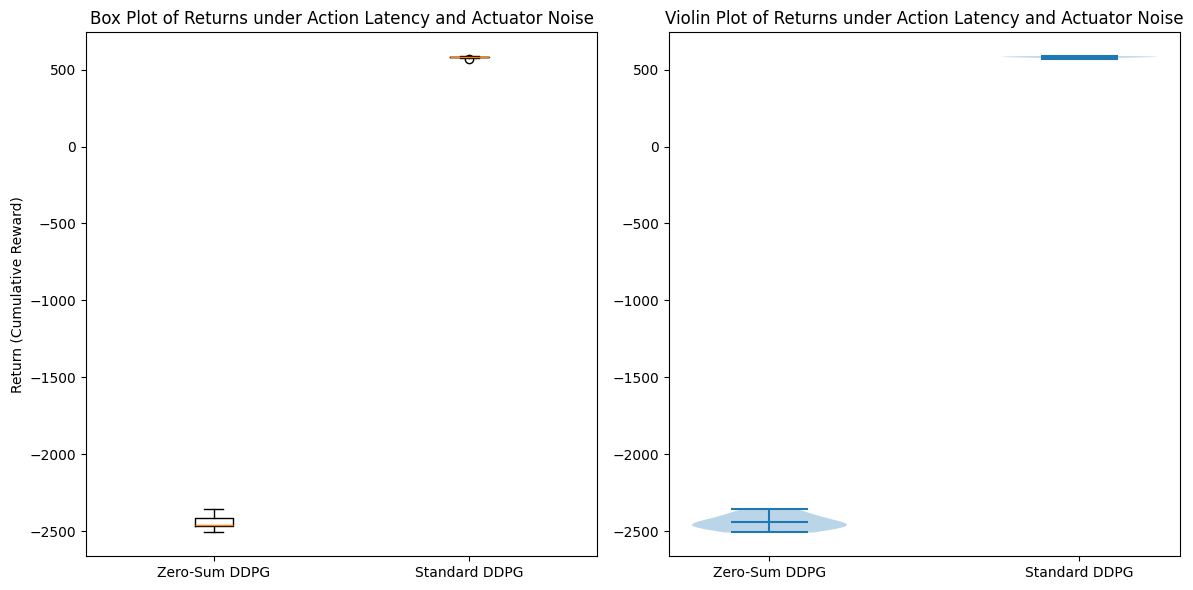

In [10]:
# Number of episodes for evaluation
num_episodes = 10

# Update the agents' environment function to use both action latency and actuator noise
zs_ppo.env_fn = lambda: make_env_latency_with_noise(delay_steps=50, disturbance_std=0.5)
ppo.env_fn = lambda: make_env_latency_with_noise(delay_steps=50, disturbance_std=0.5)

# Evaluate Zero-Sum DDPG and Standard DDPG agents with action latency and actuator noise
returns_zs_latency_noise, total_error_zs, num_of_fails_zs, total_actions_zs \
    = evaluate_agent(zs_ppo, zs_ppo.env_fn, num_episodes=num_episodes)
returns_std_latency_noise, total_error_std, num_of_fails_std, total_actions_std \
    = evaluate_agent(ppo, ppo.env_fn, num_episodes=num_episodes)

# Calculate and print average returns
avg_return_zs_latency_noise = np.mean(returns_zs_latency_noise)
avg_return_std_latency_noise = np.mean(returns_std_latency_noise)

print("Zero-Sum DDPG with Action Latency and Actuator Noise Average Return:", avg_return_zs_latency_noise)
print("Standard DDPG with Action Latency and Actuator Noise Average Return:", avg_return_std_latency_noise)

# Plot the returns for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(returns_zs_latency_noise, marker='o', label='Zero-Sum DDPG')
plt.plot(returns_std_latency_noise, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Return (Cumulative Reward)')
plt.title('Agent Returns under Action Latency and Actuator Noise')
plt.legend()
plt.show()

# Additional metrics: average error, action magnitude, and fails
avg_total_error_zs = np.mean(total_error_zs)
avg_total_error_std = np.mean(total_error_std)
print("Zero-Sum DDPG with Action Latency and Actuator Noise Average Error:", avg_total_error_zs)
print("Standard DDPG with Action Latency and Actuator Noise Average Error:", avg_total_error_std)

plt.figure(figsize=(10, 5))
plt.plot(total_error_zs, marker='o', label='Zero-Sum DDPG')
plt.plot(total_error_std, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Average Error per Step')
plt.title('Agent Error under Action Latency and Actuator Noise')
plt.legend()
plt.show()

avg_total_actions_zs = np.mean(total_actions_zs)
avg_total_actions_std = np.mean(total_actions_std)
print("Zero-Sum DDPG with Action Latency and Actuator Noise Average Action Magnitude:", avg_total_actions_zs)
print("Standard DDPG with Action Latency and Actuator Noise Average Action Magnitude:", avg_total_actions_std)

plt.figure(figsize=(10, 5))
plt.plot(total_actions_zs, marker='o', label='Zero-Sum DDPG')
plt.plot(total_actions_std, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Average Action Magnitude per Step')
plt.title('Agent Action Magnitude under Action Latency and Actuator Noise')
plt.legend()
plt.show()

avg_num_of_fails_zs = np.mean(num_of_fails_zs)
avg_num_of_fails_std = np.mean(num_of_fails_std)
print("Zero-Sum DDPG with Action Latency and Actuator Noise Average Number of Fails per Episode:", avg_num_of_fails_zs)
print("Standard DDPG with Action Latency and Actuator Noise Average Number of Fails per Episode:", avg_num_of_fails_std)

plt.figure(figsize=(10, 5))
plt.plot(num_of_fails_zs, marker='o', label='Zero-Sum DDPG')
plt.plot(num_of_fails_std, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Number of Fails per Episode')
plt.title('Agent Fails under Action Latency and Actuator Noise')
plt.legend()
plt.show()

# Normalized evaluation results
print("Normalized Zero-Sum DDPG with Action Latency and Actuator Noise Average Return:", avg_return_zs_latency_noise/1000)
print("Normalized Standard DDPG with Action Latency and Actuator Noise Average Return:", avg_return_std_latency_noise/1000)
print("Normalized Zero-Sum DDPG with Action Latency and Actuator Noise Average Error:", avg_total_error_zs*1000)
print("Normalized Standard DDPG with Action Latency and Actuator Noise Average Error:", avg_total_error_std*1000)
print("Normalized Zero-Sum DDPG with Action Latency and Actuator Noise Average Action Magnitude:", avg_total_actions_zs)
print("Normalized Standard DDPG with Action Latency and Actuator Noise Average Action Magnitude:", avg_total_actions_std)
print("Normalized Zero-Sum DDPG with Action Latency and Actuator Noise Average Number of Fails per Episode:", avg_num_of_fails_zs/10)
print("Normalized Standard DDPG with Action Latency and Actuator Noise Average Number of Fails per Episode:", avg_num_of_fails_std/10)

# Box and Violin plots (keep)
data = [returns_zs_latency_noise, returns_std_latency_noise]
print(data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Box Plot of Returns under Action Latency and Actuator Noise')
plt.ylabel('Return (Cumulative Reward)')

plt.subplot(1, 2, 2)
plt.violinplot(data, showmeans=True)
plt.xticks([1, 2], ['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Violin Plot of Returns under Action Latency and Actuator Noise')

plt.tight_layout()
plt.show()

df  = pd.DataFrame(np.array(data).T, columns=['Zero-Sum DDPG', 'Standard DDPG'])
df.head()
df.to_csv('evaluation_returns.csv', index=False)

In [11]:
# print for latex table
print(f"""${avg_return_std_latency_noise/1000:.2f}$ & ${avg_return_zs_latency_noise/1000:.2f}$ & ${avg_total_error_std*1000:.2f}$ & ${avg_total_error_zs*1000:.2f}$ & ${avg_total_actions_zs:.2f}$ & ${avg_total_actions_zs:.2f}$ & ${avg_num_of_fails_std:.2f}$ & ${avg_num_of_fails_zs:.2f}$
""")

$0.58$ & $-2.44$ & $0.03$ & $2.49$ & $2.56$ & $2.56$ & $0.00$ & $1.00$

